In [47]:
import numpy as np
import matplotlib.pyplot as plt

How about analyzing the correlation as well? 

In [92]:
def block_average(datastream, isplt=True, maxBlock=0):
    
    npoints=len(datastream)
    minBlock=1;
    if (maxBlock==0):
        maxBlock=int(npoints/4)
    
    nblocks=maxBlock-minBlock
    
    mu_block=np.zeros(nblocks)
    std_block=np.zeros(nblocks)
    
    counter=0
    for iblock in range(minBlock, maxBlock):
        ngrid_block=int(npoints/iblock)
        container=np.zeros(ngrid_block)
        for i in range(1,ngrid_block+1):
            istart=(i-1)*iblock
            iend=istart+iblock
            container[i-1]=np.mean(datastream[istart:iend])
        
        mu_block[counter]=np.mean(container)
        std_block[counter]=np.std(container)/np.sqrt(ngrid_block-1)
        counter+=1
    
    block=np.arange(minBlock,maxBlock)
    
    if isplt:
        plt.subplot(2,1,1)
        plt.plot(block,std_block,'ro-',lw=1)
        plt.xlabel('Block')
        plt.ylabel('std')
        
        plt.subplot(2,1,2)
        plt.errorbar(block,mu_block,std_block)
        plt.xlabel('Block')
        plt.ylabel('mean')
        
        plt.show()
        
        print('"<x> =" {} "+/-" {}'.format(mu_block[200], std_block[200]))
    
    return block, mu_block, std_block

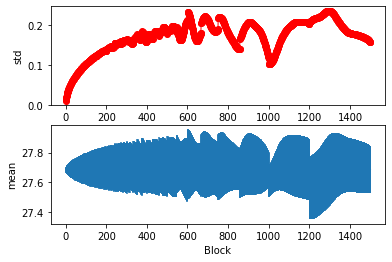

"<x> =" 27.70168465994282 "+/-" 0.13991730700639307


(array([   1,    2,    3, ..., 1497, 1498, 1499]),
 array([27.68375249, 27.68375249, 27.68375249, ..., 27.68606452,
        27.68532027, 27.68454932]),
 array([0.01039135, 0.01469671, 0.01800101, ..., 0.15863043, 0.15794262,
        0.15722938]))

In [106]:
#data=np.loadtxt('pimd.log-t25k',unpack=True, skiprows=13)
data=np.loadtxt('pimd.log',unpack=True)

vol=data[2]*6.02/1800
etot=data[5]
block_average(vol, isplt=True)

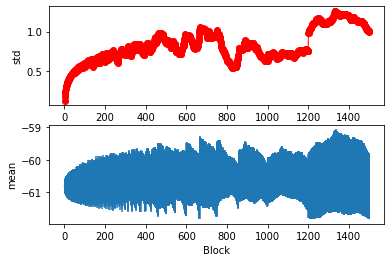

"<x> =" -60.526881603190944 "+/-" 0.6182528217150892


(array([   1,    2,    3, ..., 1497, 1498, 1499]),
 array([-60.80674317, -60.80674317, -60.80674317, ..., -60.8067529 ,
        -60.80145367, -60.80283559]),
 array([0.12247656, 0.17016011, 0.20412676, ..., 1.0064042 , 1.00311035,
        1.00096474]))

In [107]:
block_average(etot, isplt=True)

The temperature dependence of volume (cm$^3$/mol) and total energy (K/particle) of para H$_2$ system using Silvera-Goldman pair potential. 

In [108]:
temp=np.array([14,17,20,25])

vol=np.array([26.237591541629, 26.472019376535968, 27.70168465994282, 31.670958229336453])
vol_ref=np.array([26, 26.5, 27.5, 31.5])
vol_err=np.array([0.08317334270326088, 0.08837036571807667,  0.13991730700639307, 0.32227653990373784])

etot=np.array([-76.33659381663341, -69.03367939068531, -60.526881603190944,-49.19839672135729])
etot_ref=np.array([-74, -69, -63,-48])
etot_err=np.array([0.6614805380863694, 0.6046849800633235, 0.6182528217150892,0.9025057486326986])

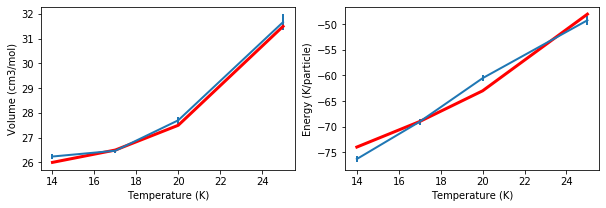

In [114]:
plt.figure(figsize=(10,3))
plt.tight_layout()

plt.subplot(1,2,1)
plt.errorbar(temp,vol,vol_err, lw=2)
plt.plot(temp, vol_ref, 'r-',lw=3)
plt.xlabel('Temperature (K)')
plt.ylabel('Volume (cm3/mol)')

plt.subplot(1,2,2)
plt.errorbar(temp,etot,etot_err, lw=2)
plt.plot(temp, etot_ref, 'r-',lw=3)
plt.xlabel('Temperature (K)')
plt.ylabel('Energy (K/particle)')

#plt.show()

plt.savefig('para.png',dpi=300,bbox_inches = "tight")
